In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier

In [30]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# KeyPoints
1. #classification_problem 
2. #dependent_variable is cardio


In [21]:
Dataframe_data = pd.read_csv('cardio_train.csv', sep=';')
Dataframe_data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [22]:
Dataframe_data.shape

(69301, 13)

In [23]:
Dataframe_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
Dataframe_data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [25]:
Dataframe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [26]:
Dataframe_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

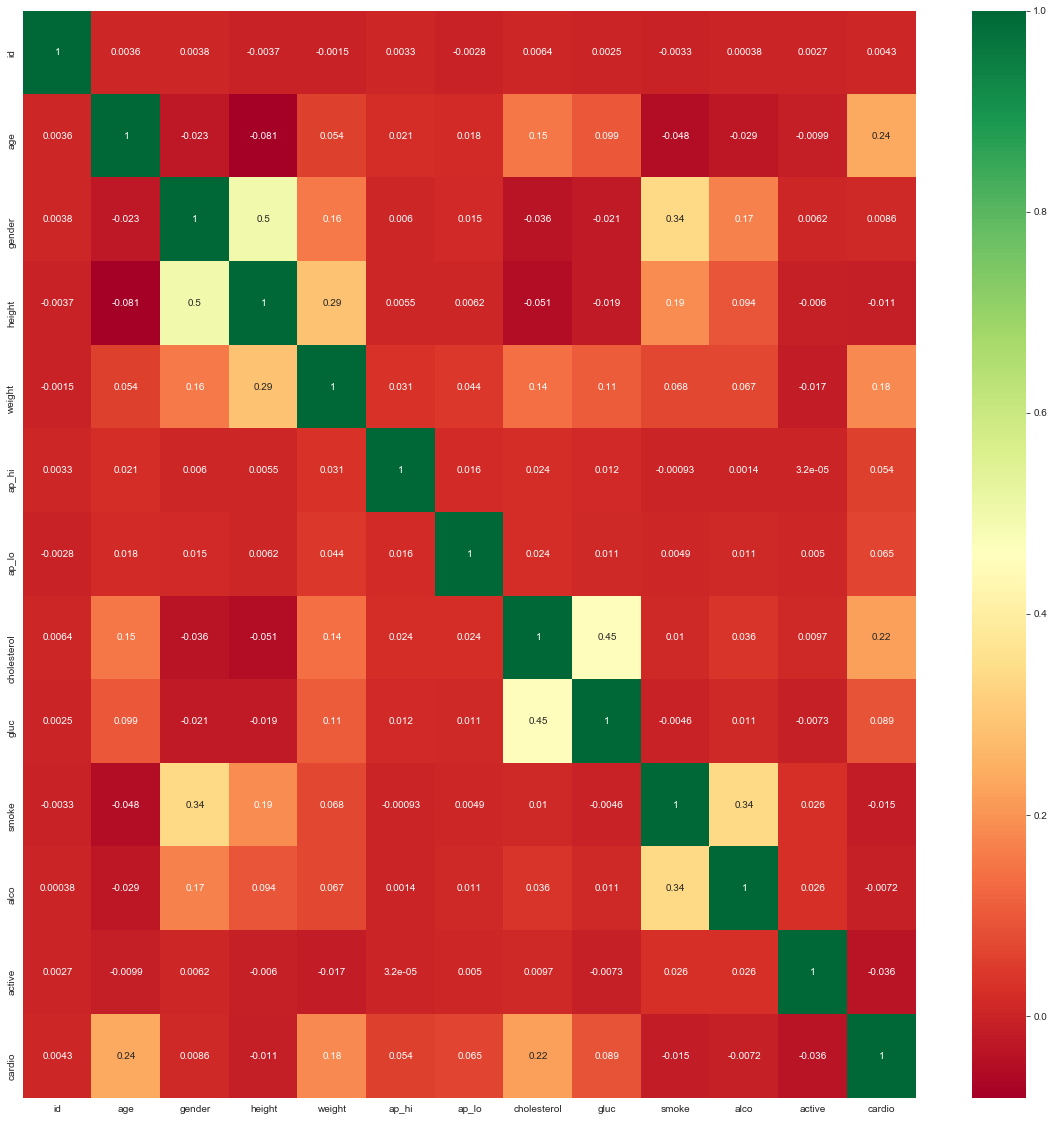

In [28]:
corrmat = Dataframe_data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214B95BBC08>,
      dtype=object)

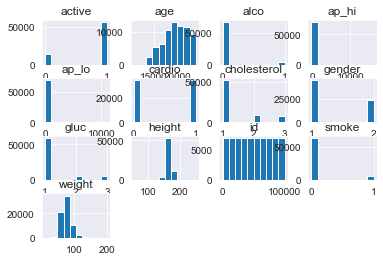

In [31]:
Dataframe_data.hist()

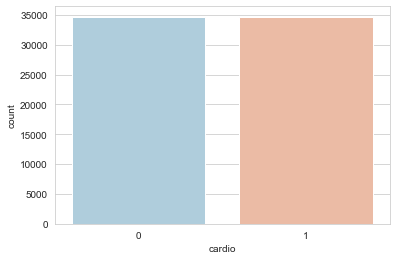

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='cardio',data=Dataframe_data,palette='RdBu_r')

In [34]:
Dataframe_data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [39]:
#Dataframe_data['cholesterol'].unique()   #array([2, 1, 3], dtype=int64)

#Dataframe_data['gluc'].unique()  #array([2, 1, 3], dtype=int64)
Dataframe_data['active'].unique()

array([1, 0], dtype=int64)

In [41]:
dataset = pd.get_dummies(Dataframe_data, columns = ['cholesterol', 'gluc'])
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,988,22469,1,155,69.0,130,80,0,0,1,0,0,1,0,0,1,0
1,989,14648,1,163,71.0,110,70,0,0,1,1,1,0,0,1,0,0
2,990,21901,1,165,70.0,120,80,0,0,1,0,1,0,0,1,0,0
3,991,14549,2,165,85.0,120,80,1,1,1,0,1,0,0,1,0,0
4,992,23393,1,155,62.0,120,80,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0
69297,99995,22601,1,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0
69298,99996,19066,2,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0
69299,99998,22431,1,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0


In [44]:
Dataframe_data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [47]:
standardScaler = StandardScaler()
columns_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'age']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [48]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,988,1.216018,1,-1.140999,-0.361739,0.007562,-0.088052,0,0,1,0,0,1,0,0,1,0
1,989,-1.953915,1,-0.166017,-0.222690,-0.121658,-0.140935,0,0,1,1,1,0,0,1,0,0
2,990,0.985802,1,0.077728,-0.292214,-0.057048,-0.088052,0,0,1,0,1,0,0,1,0,0
3,991,-1.994041,2,0.077728,0.750657,-0.057048,-0.088052,1,1,1,0,1,0,0,1,0,0
4,992,1.590525,1,-1.140999,-0.848413,-0.057048,-0.088052,0,0,1,0,1,0,0,1,0,0


In [49]:
X = dataset.drop(['id', 'age', 'cardio'], axis =1)
y=  dataset['cardio']

In [50]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

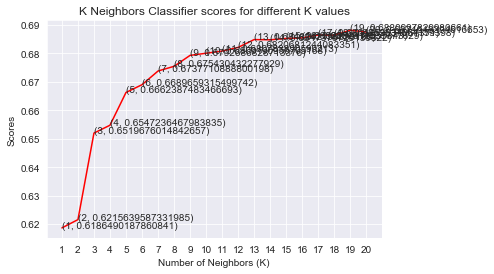

In [59]:

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [60]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [61]:
score.mean()

0.6820681244083351

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.2)

In [63]:
# Function to run different model types

def fit_model(X, y, model_name='lr', model_type=LogisticRegression()):
    
    # Pipeline for pre-processing
    pipe = Pipeline([
        ('scale', StandardScaler()),
        (model_name, model_type)
    ])
    # Fit the model 
    model = pipe.fit(X, y)
    
    #Score
    score = model.score(X, y)
                   
    # Print attributes
    print(f"For model: {model_type}")
#     print(f"Score: {score}")
    
    return model

In [64]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluate training data
    preds_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)

    # Evaluate testing data
    preds_test = model.predict(X_test)
    score_test = model.score(X_test, y_test)
    
    # Print results
    
    print(f'Train Score: {score_train:.4f}')
    print(f'Test Score: {score_test:.4f}')

In [65]:
logreg = fit_model(X_train, y_train, model_name='logreg', model_type=LogisticRegression())

evaluate_model(logreg, X_train, X_test, y_train, y_test)

For model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Train Score: 0.7206
Test Score: 0.7181


In [66]:
knn = fit_model(X_train, y_train, model_name='knn', model_type=KNeighborsClassifier())

evaluate_model(knn, X_train, X_test, y_train, y_test)

For model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Train Score: 0.7605
Test Score: 0.6666


In [67]:
dtc = fit_model(X_train, y_train, model_name='dtc', model_type=DecisionTreeClassifier())

evaluate_model(dtc, X_train, X_test, y_train, y_test)

For model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Train Score: 0.9072
Test Score: 0.6455


In [68]:
rf = fit_model(X_train, y_train, model_name='rf', model_type=RandomForestClassifier())

evaluate_model(rf, X_train, X_test, y_train, y_test)

For model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train Score: 0.9072
Test Score: 0.6873


In [69]:

ada = fit_model(X_train, y_train, model_name='ada', model_type=AdaBoostClassifier())

evaluate_model(ada, X_train, X_test, y_train, y_test)

For model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Train Score: 0.7253
Test Score: 0.7265


In [70]:

bag = fit_model(X_train, y_train, model_name='bag', model_type=BaggingClassifier())

evaluate_model(bag, X_train, X_test, y_train, y_test)

For model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Train Score: 0.8939
Test Score: 0.6762
